IMPORTING REQURIED MODULES

In [65]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

LOADING THE DATASET

In [66]:
data = pd.read_csv("Student_Performance.csv")

In [67]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [68]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

CONVERTING THE CATEGORICAL COLUMNS INTO 0'S OR 1'S

In [69]:
data['Extracurricular Activities'] = np.where(data['Extracurricular Activities'].str.contains('Yes'), 1, 0)
data['Extracurricular Activities'].astype('int')

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64

In [70]:
data.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


SPLITTING INTO DEPENDENT AND INDEPENDENT VARIABLES

In [71]:
X = data.iloc[:, :-1] #INDEPENDENT VARIABLES
Y = data.iloc[:,-1] #DEPENDENT VARIABLE

SPLITTING THE DATASETS INTO TRAIN AND TEST DATASETS

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

STANDARDIZING THE INDEPENDENT VARIABLES

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


TRAINING THE LINEAR REGRESSION MODEL

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

COMPARING WITH EXITING VS PREDICTED RESULTS

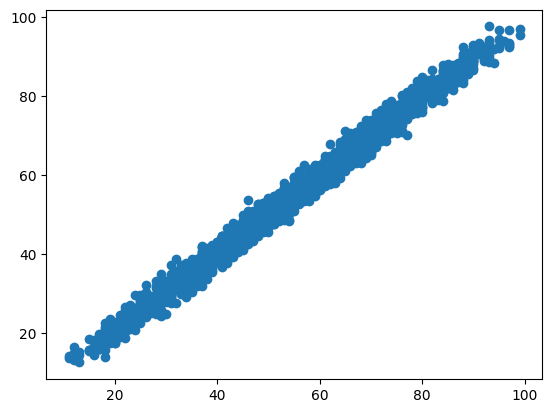

In [75]:
ypred = model.predict(X_test)
plt.scatter(y_test, ypred)

CALCULATING METRICS

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, ypred))
print("Mean Absolute Error:", mean_absolute_error(y_test, ypred))
print("R2 Score:", r2_score(y_test, ypred))

Mean Squared Error: 4.082628398521842
Mean Absolute Error: 1.6111213463123022
R2 Score: 0.9889832909573145


EXPORTING THE MODEL

In [77]:
import pickle
pickle.dump(model, open('student_performance_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))